In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

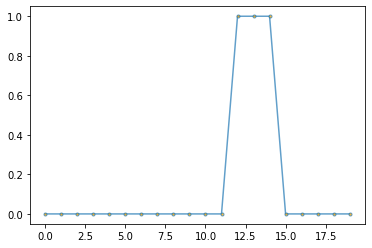

In [34]:
# generate dataset
time_duration = 20     # The length of time sequence
observation_states = 2 #number of observation states
include_noise = 0
sample_length = 200    # how many samples do we want
num_anomaly = 40       # The number of anomaly samples we want


"""This part is to generate a simple dataset, 
where normal behavial is we have a continuous wavelet with a certain length,
while in anomaly cases the wavelet is not continuous"""
y_label = [1] * num_anomaly + [0] * (sample_length - num_anomaly)
#anomaly_label = random.sample(y_label,num_anomaly)
wavelet_length = 3
wavelet = list(map(lambda x: 1, [i for i in range(0,wavelet_length)]))
#wavelet = list(map(lambda x: int(sin(x/10)), [i for i in range(0,wavelet_length)]))
x_dataset = np.zeros((sample_length, 20),dtype='int32')
for i in range(0, num_anomaly):
    insert_num = random.randint(0,int(time_duration/wavelet_length))
    insert_pos = random.sample(range(0,time_duration - wavelet_length),insert_num)
    insert_len = np.random.randint(0, wavelet_length, size = insert_num)
    sample = [0]*time_duration
    for j in range(0, len(insert_pos)):
        sample[insert_pos[j]:insert_pos[j] + insert_len[j]] = wavelet[0: insert_len[j]]
    x_dataset[i] = sample
for i in range(num_anomaly, sample_length):
    insert_pos = random.randint(0,time_duration - wavelet_length)
    sample = [0]*time_duration
    sample[insert_pos: insert_pos + wavelet_length] = wavelet
    x_dataset[i] = sample

plt.plot(x_dataset[65], ".-", label="observations", ms=6, mfc="orange", alpha=0.7)
plt.show()

dataset = {'x': x_dataset, 'y': y_label}

In [28]:
n_anomaly = 40
lengthX = len(dataset['x'])
lengthY = len(dataset['y'])
outlierX = dataset['x'][:n_anomaly]
outlierY = dataset['y'][:n_anomaly] # all ones
nomialX = dataset['x'][n_anomaly:lengthX]
nomialY = dataset['y'][n_anomaly:lengthY]
X_train, X_test, y_train, y_test = train_test_split(
    nomialX, nomialY, test_size = 0.3)
X_test_anomaly = np.concatenate((outlierX, X_test), axis = 0)
y_test_anomaly = np.concatenate((outlierY, y_test), axis = 0)

# concatenate the data into sequences used for fit and predict
X_train_arr = X_train[0]
X_test_anomaly_arr = X_test_anomaly[0]
X_test_arr = X_test[0]
X_train_len = [len(X_train[0])]
X_test_len = [len(X_test[0])]
X_test_anomaly_len = [len(X_test[0])]

for i in range(X_train.shape[0] - 1):
    X_train_arr = np.concatenate([X_train_arr, X_train[i + 1]])
    X_train_len = np.concatenate([X_train_len, [len(X_train[i + 1])]])

for i in range(X_test_anomaly.shape[0] - 1):
    X_test_anomaly_arr = np.concatenate([X_test_anomaly_arr, X_test_anomaly[i + 1]])
    X_test_anomaly_len = np.concatenate([X_test_anomaly_len, [len(X_test_anomaly[i + 1])]])

for i in range(X_test.shape[0] - 1):
    X_test_arr = np.concatenate([X_test_arr, X_test[i + 1]])
    X_test_len = np.concatenate([X_test_len, [len(X_test[i + 1])]])




In [38]:
my_file = open("./Generated_dataset/Test_anomaly_set_array.txt", "w")
for element in X_test_anomaly_arr:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_array.txt is the file stores the data array

my_file = open("./Generated_dataset/Test_anomaly_set_array_size.txt", "w")
my_file.write(str(len(X_test_anomaly_arr)))
my_file.close()
# Test_anomaly_set_array_size.txt is the file stores the size of data array

my_file = open("./Generated_dataset/Test_anomaly_set_length.txt", "w")
for element in X_test_anomaly_len:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_length.txt is the file stores the length array (length of each samples)

my_file = open("./Generated_dataset/Test_anomaly_set_samples.txt", "w")
my_file.write(str(len(X_test_anomaly_len)))
my_file.close()
# Test_anomaly_set_samples.txt is the file stores the number of samples

my_file = open("./Generated_dataset/Test_anomaly_set_label.txt", "w")
for element in y_test_anomaly:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_label.txt is the file stores the labels of samples

In [35]:
n_components = 5
n_features = 2
model = hmm.MultinomialHMM(n_components = n_components)

# initialize number of features V
model.n_features = n_features

le = preprocessing.LabelEncoder()
le.fit([0., 1.])

# train the model
data = X_train_arr
data = le.transform(data)
model.fit(data.reshape(-1, 1), X_train_len)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=5,
               n_iter=10, params='ste',
               random_state=RandomState(MT19937) at 0x25FDB945E18,
               startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
               verbose=False)

In [36]:
for i in range(len(X_test)):
    data = X_test[i]
    data = le.transform(data)
    print(model.score(data.reshape(-1, 1)))
print("---------------")
for i in range(40):
    data = X_test_anomaly[i]
    data = le.transform(data)
    print(model.score(data.reshape(-1, 1)))

-5.744400704182111
-5.911227626458176
-5.911286776175713
-4.921131947024543
-5.91120340136915
-5.911286776175713
-5.91120340136915
-5.911233979570824
-5.9112275925752495
-5.911227342107696
-4.921131947024543
-5.891905863838136
-5.911225018642304
-4.921131947024543
-5.91122769489003
-5.909133013743883
-4.921131947024543
-5.911227342107696
-5.911002289650574
-5.91122769489003
-5.911286776175713
-5.916343858280099
-5.91122769489003
-5.911227342107696
-5.744400704182111
-5.911227342107696
-5.911227626458176
-5.9112275925752495
-5.911225018642304
-5.9112275925752495
-5.916343858280099
-5.911225018642304
-5.744400704182111
-5.909133013743883
-5.891905863838136
-5.911227342107696
-4.921131947024543
-5.891905863838136
-5.91122769489003
-5.916343858280099
-5.911777968530587
-5.911227626458176
-5.958376997704242
-4.921131947024543
-5.91120340136915
-5.911777968530587
-5.916343858280099
-5.744400704182111
---------------
-4.958637632128557
-16.343530596459928
-13.31447336276449
-1.334206579269466

In [39]:
# do anomaly detection and obtain precision, recall and F-score
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(X_test_anomaly)):
    data = X_test_anomaly[i]
    data = le.transform(data)
    if(model.score(data.reshape(-1, 1)) < -10.):
        positive = 1
    else:
        positive = 0
    if(positive):
        if(y_test_anomaly[i] == 1):
            TP += 1
        else:
            FP += 1
    else:
        if(y_test_anomaly[i] == 0):
            TN += 1
        else:
            FN += 1
print("TP =", TP, "TN =", TN, "FP =", FP, "FN =", FN )
Precision = "{:.0%}".format(TP / (TP + FP))
Recall = "{:.0%}".format(TP / (TP + FN))
Fscore = "{:.0%}".format(2 * TP / (2 * TP + FP + FN))
print("Precision =", Precision, "Recall =", Recall, "Fscore =", Fscore)

TP = 12 TN = 48 FP = 0 FN = 28
Precision = 100% Recall = 30% Fscore = 46%
